In [1]:
import tensorflow.compat.v1 as tf
import numpy as np

from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import CarliniL2Method
from art.attacks.evasion import DeepFool
from art.estimators.classification import TensorFlowV2Classifier

In [2]:
mnist_model = tf.keras.models.load_model('models/mnist_model')
mnist_model.input_shape

(None, 28, 28)

In [3]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [4]:
classifier = TensorFlowV2Classifier(
    model=mnist_model,
    nb_classes=10,
    input_shape=mnist_model.input_shape,
    loss_object=loss_fn
)

In [5]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [6]:
attack = FastGradientMethod(estimator=classifier)

In [7]:
x_test_adv = attack.generate(x=x_test)


In [8]:
predictions = classifier.predict(x_test_adv)
accuracy = np.sum(np.argmax(predictions, axis=1) == y_test) / len(y_test)
print("Accuracy on adversarial test examples: {}%".format(accuracy * 100))

Accuracy on adversarial test examples: 2.55%


In [9]:
attackDF = DeepFool(classifier=classifier)
x_test_df = attackDF.generate(x=x_test)

DeepFool:   0%|          | 0/10000 [00:00<?, ?it/s]

In [10]:
predictions = classifier.predict(x_test_df)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=0)) / len(y_test)
print("Accuracy on deep fool test examples: {}%".format(accuracy * 100))

Accuracy on deep fool test examples: 9.379999999999999%


In [11]:
attackCW = CarliniL2Method(classifier=classifier)
x_test_CW = attackCW.generate(x=x_test)

C&W L_2:   0%|          | 0/10000 [00:00<?, ?it/s]

In [13]:
predictions = classifier.predict(x_test_CW)
accuracy = np.sum(np.argmax(predictions, axis=1) == np.argmax(y_test, axis=0)) / len(y_test)
print("Accuracy on Carlini Wagner test examples: {}%".format(accuracy * 100))

Accuracy on Carlini Wagner test examples: 15.98%


In [10]:
from matplotlib import pyplot as plt

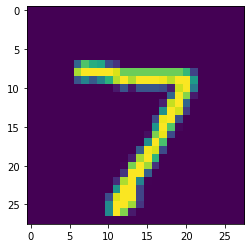

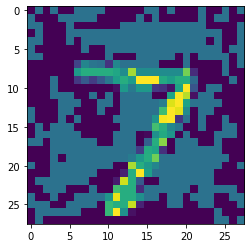

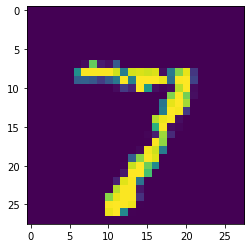

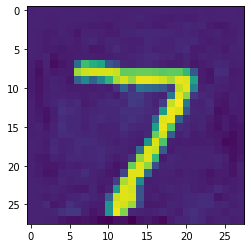

In [28]:
plt.imshow(x_test[0])
plt.show()
plt.imshow(x_test_adv[0])
plt.show()
plt.imshow(x_test_CW[0])
plt.show()
plt.imshow(x_test_df[0])
plt.show()

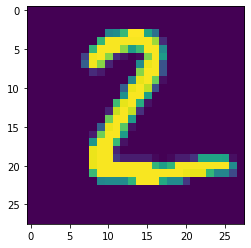

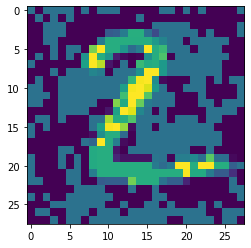

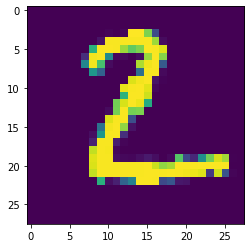

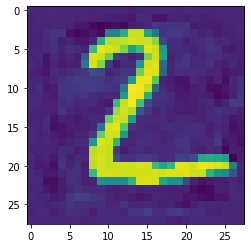

In [29]:
x = 1
plt.imshow(x_test[x])
plt.show()
plt.imshow(x_test_adv[x])
plt.show()
plt.imshow(x_test_CW[x])
plt.show()
plt.imshow(x_test_df[x])
plt.show()

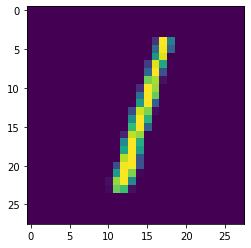

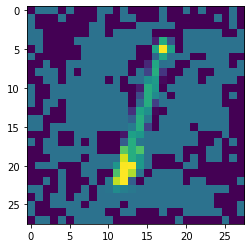

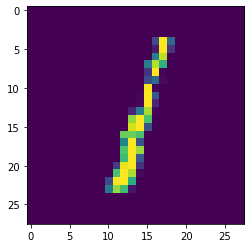

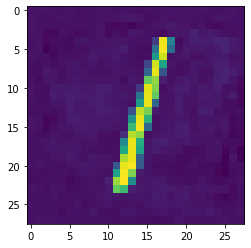

In [30]:
x = 2
plt.imshow(x_test[x])
plt.show()
plt.imshow(x_test_adv[x])
plt.show()
plt.imshow(x_test_CW[x])
plt.show()
plt.imshow(x_test_df[x])
plt.show()

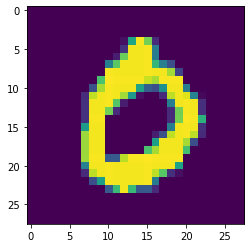

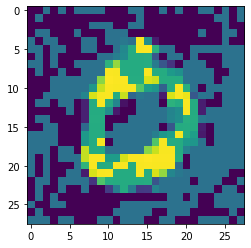

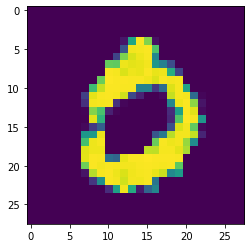

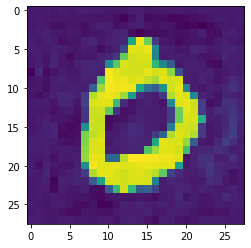

In [31]:
x = 3
plt.imshow(x_test[x])
plt.show()
plt.imshow(x_test_adv[x])
plt.show()
plt.imshow(x_test_CW[x])
plt.show()
plt.imshow(x_test_df[x])
plt.show()

In [37]:
with open('MNIST_Adversarial_Generated/MNISTFastGradient.npy', 'wb') as f:
    np.save(f, x_test_adv)
with open('MNIST_Adversarial_Generated/MNISTDeepFool.npy', 'wb') as f:
    np.save(f, x_test_df)
with open('MNIST_Adversarial_Generated/MNISTCarliniWagner.npy', 'wb') as f:
    np.save(f, x_test_CW)

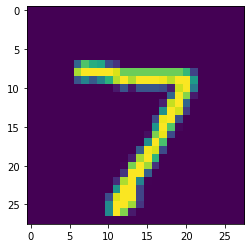

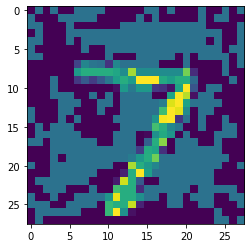

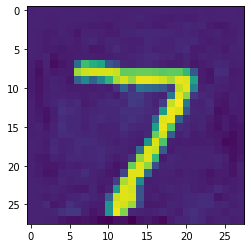

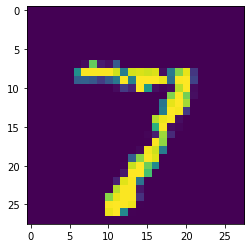

In [12]:
plt.imshow(x_test[0])
plt.show()
with open('MNIST_Adversarial_Generated/MNISTFastGradient.npy', 'rb') as f:
    a = np.load(f)
    plt.imshow(a[0])
    plt.show()
    
with open('MNIST_Adversarial_Generated/MNISTDeepFool.npy', 'rb') as f:
    a = np.load(f)
    plt.imshow(a[0])
    plt.show()
with open('MNIST_Adversarial_Generated/MNISTCarliniWagner.npy', 'rb') as f:
    a = np.load(f)
    plt.imshow(a[0])
    plt.show()

[[[-3.94273084e-03 -1.91409199e-04  2.29632729e-04 ...  1.18040130e-03
   -9.32292780e-04 -3.33723496e-03]
  [-7.02526129e-04  2.27904366e-03 -3.54117900e-03 ... -7.54678738e-04
   -2.84751935e-04  3.81440530e-03]
  [ 4.22641821e-03  2.80248327e-03 -4.79698472e-04 ... -2.44157296e-02
   -2.46995338e-03  9.30009526e-04]
  ...
  [ 2.89968797e-03 -1.14551403e-04  3.13917994e-02 ...  1.55322123e-02
   -1.24642383e-02  2.71565584e-03]
  [ 2.23700493e-03  8.56053608e-04  1.57254937e-04 ... -1.01364776e-02
   -2.61663721e-04 -6.71346323e-04]
  [ 2.91015557e-03  4.08917153e-03 -4.60875500e-03 ...  7.45031459e-04
   -5.74479112e-03 -3.12774698e-03]]

 [[ 8.82840808e-03 -5.85763436e-03  9.42602346e-05 ...  1.05556229e-03
   -2.74652755e-03 -4.31109162e-04]
  [-5.62253734e-03  3.62428208e-03 -5.22439880e-03 ... -3.98533605e-03
   -6.05093967e-03 -4.77851648e-03]
  [-3.66709521e-03 -1.23355479e-03  1.04651204e-03 ... -1.34608140e-02
   -5.40306140e-03  5.98502485e-03]
  ...
  [-2.77352263e-03 -5.3